<a href="https://colab.research.google.com/github/PatrickNellestijn/Assignment-Strings/blob/main/assignment_retail_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Assignment: Retail

Congratulations! You've reached the final assignment for the course before the bonus modules. Here we'll ask you to work with a dataset from the Dutch *Centraal Bureau voor de Statistiek* (CBS, English: Statistics Netherlands). It contains monthly growth percentages for various branches of the retail sector. You'll be required to answer open questions as well as write code that handles the data and crunches numbers.

*Answer open questions as though you were writing a report. Answers that are too vague, too short or too sloppy will be rejected.*

## 0. Load required modules

First, we need to load some modules that we're going to use. Do that in the next code cell. If you don't know yet which modules you'll use, just read on and come back here to import them later. **Don't forget to run the cell whenever you make an edit!**

In [28]:
import csv
import pandas

## 1. Data Preparation
Now we need to load and parse the data. The data should be located in the same folder as this notebook (whether that's on Google Colab or your local machine). Make sure you have working file path from your notebook to the supplied `data.csv` file. Put an `x` in the checkbox below when you're ready.

- [ ] *I have a working file path to the `data.csv` file.*

You are now ready to proceed with reading the data into your program.

### 1.1 Read the CSV

The data comes in the form of a `csv`-file. CSV stands for 'comma separated values'. Oddly enough it need not be the case that the values are *really* separated by commas. In this case, the **delimiter** - the character that separates the columns within a datapoint - is *not* a comma. It's up to you to inspect `data.csv` and find out what the delimiter is.

Once you know what the delimiter is, you can use Python's `csv` module to read each of the datapoints to a dictionary. Some tips:

- The module's name is `csv`.
- You can find its documentation [here](https://docs.python.org/3/library/csv.html)
- We suggest you use the `DictReader` class. There's an example on how to use `DictReader` in the linked documentation.
- Instead of printing the rows (like in the example), we suggest you store all the rows as `dict`s in a `list`.

**1. In the code cell below, write code that opens and reads the data. By the end of the cell, you should have a variable `data` that is a list of dictionaries that each contain a datapoint.**

In [29]:
data = []
dict = {}
with open("/content/retail-data.csv", newline='') as csv_file:
  csv_reader = csv.DictReader(csv_file, delimiter=";")
  for row in csv_reader:
    for key, value in row.items():
      dict[key] = value
      data.append(dict)
print(data)

[{'Bedrijfstakken/branches (SBI 2008)': '4791 Postorderbedrijven, webwinkels', 'Perioden': '2021 maart*', 'Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)': '   297.3', 'Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)': '   285.8'}, {'Bedrijfstakken/branches (SBI 2008)': '4791 Postorderbedrijven, webwinkels', 'Perioden': '2021 maart*', 'Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)': '   297.3', 'Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)': '   285.8'}, {'Bedrijfstakken/branches (SBI 2008)': '4791 Postorderbedrijven, webwinkels', 'Perioden': '2021 maart*', 'Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)': '   297.3', 'Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)': '   285.8'}, {'Bedrijfstakken/branches (SBI 2008)': '4791 Postorderbedrijven, webwinkels', 'Perioden': '2021 maart*', 'Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)': '   297.3', 'Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)': '   285.8'}, {'Bedrijfstakken/branches (SBI 2008)': 

### 1.2 Parse and clean the data

You now have a list of dictionaries that each contain some data. But what data? Answer the following questions to become familiar with this dataset. It requires you to write and execute Python code (you can add code cells if you wish), and also search the web for terms you're not familiar with.

**2. What are the column names in this dataset, and what do they mean? Be specific.**

*TODO: Your answer here.*
Bedrijfstakken/branches (SBI2008)
Perioden
Omzet ongecorrigeerd/Indexcijfers/Waarde(2015=100)
Omzet ongecorrigeerde/Indexcijfers/Volume(2015=100)

**3. For each column, list what data type it should have (`str`, `int`, `float` or `datetime.date`).**

*TODO: Your answer here.*
Kolom 1 = 'Str'
Kolom 2 = 'Float'
Kolom 3 = 'Float'
Kolom 4 = 'datetime.date'

    
**4. In the code cell below, write code that changes the column names to something more convenient for writing readable code. Be sure to choose English, correct and meaningful names.**

In [36]:
for dict in data:
  dict['Branches'] = dict.pop('Bedrijfstakken/branches (SBI 2008)')
  dict['Periods'] = dict.pop('Perioden')
  dict['Turnover_value_index'] = dict.pop('Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)')
  dict['Turnover_volume_index'] = dict.pop('Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)')

print(data)

KeyError: ignored

**5. In the code cell below, write code that casts all the data to the right type.**

Tips:
- If you overwite your data, running the casting operation you're about to implement more than once might result in errors. In that case you can opt not to reuse a variable or restart and rerun your notebook for every retry.
- The data is in Dutch. For some columns this does not matter, but for one in particular it makes parsing it a little bit harder. There is a way to handle this in a few lines of code. You'll need Python's `locale` module for this, as well as the special string `'nl_NL.UTF-8'`. If you're not sure how to use this information after searching the web for a while, it's OK to take the long way around and write custom code to handle the Dutch words. *Note: Google Colab does not support the Dutch locale at this time. If you use Google Colab, you unfortunately can't use the `locale` trick and must write extra code yourself to handle the Dutch dates.*
- The parsing script is bound to run into errors. **Do not modify the data file on disk.** Carefully read the error, examine why it works on most values and crashes on some others, and apply a fix in your code! We'll give you some tips:
    - A handful of values in the `Perioden`-column might cause an error due to an unexpected character. You can safely ignore that character.
    - Handle missing numerical values by replacing them with `-1.`. Be sure to maintain the correct datatype for that column!

In [56]:
from datetime import datetime
#controleren van de data
#for row in data:
 #   if type(row['Perioden']) is not datetime.date:
  #      print("Voldoet niet:", row['Perioden'], "is", type(row['Perioden']))

for x in data:
        form_date = x['Perioden'].replace("*","")
        x['Perioden'] = form_date
        
​def translate_period(period_string):
    dict = {
        "januari": "january",
        "februari": "february",
        "maart": "march",
        "mei": "may",
        "juni": "june",
        "juli": "july",
        "augustus": "august",
        "oktober": "october",
        "november": "november",
        "december": "december",
    }
    for k, v in dict.items():
        period_string = period_string.replace(k, v)
    return period_string 
  
for rows in data:
  datetime.strptime(translate_period(rows['Perioden']), "%Y%B")
  print(rows)

SyntaxError: ignored

## 2. Data Exploration

You are now ready to explore the data.

**6. In the code cell below, print the following metadata. Format the printed text in a nice and tidy way. Put an `x` in the checkboxes when you've succeeded.**

- [x] **The number of datapoints in the dataset.**
- [ ] **The number of unique branches of the retail sector the data covers.**
- [ ] **The first month covered by the data.**
- [ ] **The last month covered by the data.**

In [11]:
import csv
data_loc = "/content/sample_data/retail-data.csv"
with open(data_loc) as f:
    csv_reader = csv.DictReader(f, delimiter=';')
    data_dicts = list(csv_reader)
print(f'Number of datapoints: {len(data_dicts)}')

for k in data_dicts[0].keys():
    print(f'- {k}')
    
unique_vals = [set() for _ in data_dicts[0].keys()]
missing = 0
for datapoint in data_dicts:
    for i, val in enumerate(datapoint.values()):
        unique_vals[i].add(val)
        if val is None or val == '':
            missing += 1
print(f'Missing/empty values: {missing}')

print('Number of branches')
for i, k in enumerate(data_dicts[0].keys()):
    print('- {:<25}{:5}'.format(k, len(unique_vals[i])))

#print('De eerste periode met data', type(data_dicts[0]['']))
#for row in data_dicts[::int(len(data_dicts) / 20)]:
 #   print(row['Periods'])

Number of datapoints: 3120
- Bedrijfstakken/branches (SBI 2008)
- Perioden
- Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)
- Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)
Missing/empty values: 0
Number of branches
- Bedrijfstakken/branches (SBI 2008)   16
- Perioden                   195
- Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)  903
- Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)  951


**7. In the code cell below, extract the revenue numbers for the following two sectors and put them in a list named exactly as indicated. Also create a list that contains all the months in ascending order. Run the cell after it to see a plot of the numbers if you did it correctly.**

- [ ] Months in ascending order $\Longrightarrow$ `months`
- [ ] Clothing stores $\Longrightarrow$  `clothing_stores_revenue`
    - Tip: the Dutch word for *'clothing'* is *'kleding'*
- [ ] Mail order companies and web shops $\Longrightarrow$ `mail_order_revenue`
    - Tip: the Dutch term for *'mail order companies'* is *'postorderbedrijven'*

In [ ]:
def sort_months(data):
    month_list = []
    for data_dicts in data:     
        month_list.append(data_dicts["Periods"])
    return sorted(set(month_list))
months = (sort_months(data))
print(months)

def clothing_stores_revenues():
  if 'branches' == "Clothing stores"




SyntaxError: ignored

There was an error creating the plot.
Check if your lists are correctly named and assembled.
Here's your error, for your debugging pleasure.


NameError: ignored

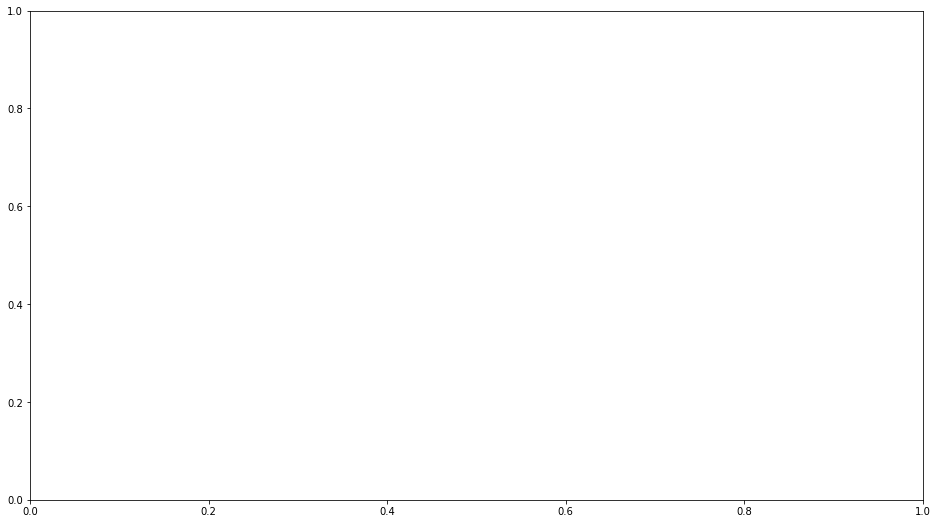

In [12]:
# Do not modify the code in this cell.
import matplotlib.pyplot as plt
%matplotlib inline

try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months, clothing_stores_revenue, label="Clothing stores' revenue")
    ax.plot(months, mail_order_revenue, label="Mail order companies' revenue")
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**8. How do the two branches compare? Discuss any yearly cycles you observe, as well as long-term developments. Also explain why you think these patterns are there. Pretend you are writing this to your supervisor or a client who asked you to analyze this dataset.**

*TODO: Your answer here.*

## 3. Computing With Data

### 3.1 Year Over Year Change

Let's take a closer look at these two branches of retail: clothing stores and mail order companies. A commonly used metric in business is the year-over-year revenue change. It is computed like so:

$$\text{YoY}_\text{month} = \frac{\text{Revenue}_\text{month}}{\text{Revenue}_\text{same month last year}} \times 100$$

Search the web for a longer explanation of this term if you'd like one.

**9. Why should we compare revenue for a particular month to the revenue of that same month, one year ago?**

*TODO: Your answer here.*

**10. In the code cell below, compute the year-over-year revenue change for every month, for both branches of the retail sector, each in their own new list. Skip the first year (why?). Put an `x` in the checkboxes when you're ready. Run the next cell to see a new plot for your data.**

- [ ] Clothing stores $\Longrightarrow$ `clothing_stores_yoy`
- [ ] Mail order companies $\Longrightarrow$ `mail_order_yoy`



In [ ]:
# Your code here.

In [ ]:
try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months[12:], clothing_stores_yoy, label="Clothing stores' YoY")
    ax.plot(months[12:], mail_order_yoy, label="Mail order companies' YoY")
    ax.set_xlabel('Date')
    ax.set_ylabel('YoY change, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**11. In the code cell below, find the best and worst months for both branches of the retail sector in terms of year-over-year revenue change. Print the branch, month and YoY in a nice and tidy way.**

In [ ]:
# Your code here.

### 3.2 Similarity Between Branches

We've seen that the pattern for revenue is quite different for clothing stores and mail order companies. In other words: their revenues don't move up or down together. A way to make this observation more specific is to compute the **correlation coefficient**. It is a number between $-1$ and $1$ that describes the relation between two *random variables*. Here is how it works applied to our revenue numbers:

- If the correlation coefficient for the revenue of two branches of the retail sector is $1$, their revenue is *positively correlated*. This means that when the revenue of branch A goes up, the revenue of branch B also goes up. In other words: the revenues for both branches go up together.
- If the correlation coefficient is $-1$, the revenues of the two branches are *negatively correlated*. This means that if A's revenue goes up, B's revenue goes down. Similarly, if B's revenue goes up, A's revenue goes down. They move in the exact opposite direction.
- If the correlation coefficient is $0$, there is no clear pattern between the revenues of both branches.

Here's a table that summarizes this information:

| Correlation coefficient | Meaning                              |
|-------------------------|--------------------------------------|
| $1$                     | Revenues go up together              |
| $0$                     | No pattern                           |
| $-1$                    | Revenues move in opposite directions |

Note that there is a continuous scale between $-1$ and $1$! A correlation coefficient of $0.3$ indicates a somewhat positively correlated relationship.

And here's an image that visualizes the correlation coefficient.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg"/>

We've provided a function `corrcoef` that computes the correlation coefficient for two lists.

**11. In the code cell below, use the function `corrcoef` to compute the correlation coefficient for each pair of branches in our dataset. Then print a sorted table that shows each unique pair and their correlation coefficients. Sort by the correlation coefficient, in descending order. You can take inspiration from this table (but it doesn't have to look exactly like it):**

```
Coeff   Branch A                                          Branch B                                          
===========================================================================================================
0.98    4711, 472 Winkels in voedingsmiddelen             4711 Supermarkten                                 
0.91    475 Winkels in overige huishoudwaren              4752 Winkels in doe-het-zelfartikelen             
0.91    47528 Bouwmarkten                                 4752 Winkels in doe-het-zelfartikelen               
```

In [ ]:
import numpy as np

# Provided function. Use this to obtain the correlation coefficient for two lists.
def corrcoef(branch_a, branch_b):
    return np.corrcoef(branch_a, branch_b)[0, 1]

# Your code here.

**12. Pick two correlation coefficients from the table you created and explain why you think these values are the way that they are. Be sure to pick two coefficients that are not close to each other.**

*TODO: Your answer here.*

**13. Imagine you are a very risk-averse investor shaping your portfolio of investments in the retail sector. How would you use the information in the table you created to minimize your investment risk? Which two branches of the retail sector would you invest in if you had to pick two? Use the correlation coefficient in your answer.**

*TODO: Your answer here.*

## 4. Conclusion

You made it! This was the Retail assignment. Before you hand it in: restart the kernel and run all the cells. Then save it to GitHub and share the link with us in the usual way.